![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              332 non-null    int64  
 1   culmen_length_mm   332 non-null    float64
 2   culmen_depth_mm    332 non-null    float64
 3   flipper_length_mm  332 non-null    float64
 4   body_mass_g        332 non-null    float64
 5   sex                332 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 15.7+ KB
None
     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
3                36.7             19.3  ...           1         0
4                39.3             20.6  ...           0         1
..                ...              ...  ...     

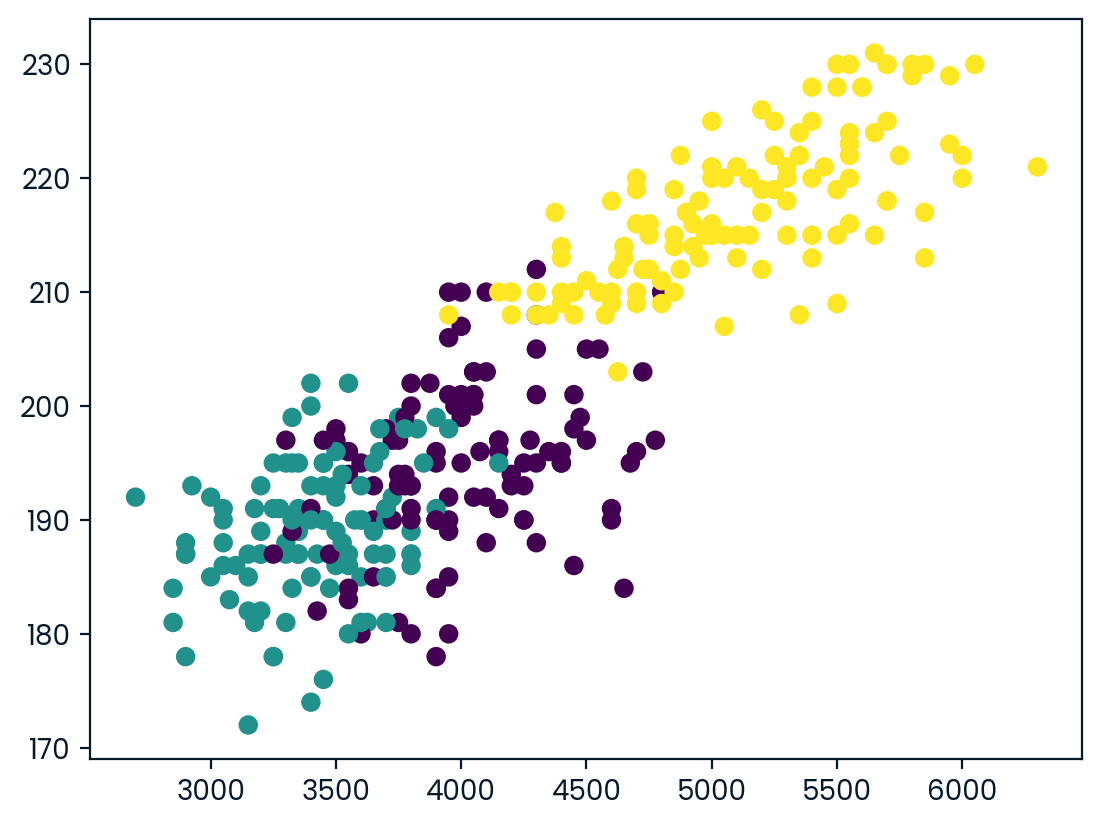

In [35]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df = penguins_df.dropna().reset_index()
print(penguins_df.info())

X = penguins_df.drop(columns=["index"])
X = pd.get_dummies(X, columns=["sex"])
print(X)

X_train = X.to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train)

stat_penguins = penguins_df.copy()
stat_penguins = penguins_df.drop(columns=["sex"])
print(stat_penguins)

stat_penguins["cluster"] = kmeans.labels_
stat_penguins = stat_penguins.groupby("cluster").mean()
print(stat_penguins)

plt.scatter(penguins_df["body_mass_g"], penguins_df["flipper_length_mm"], c = kmeans.labels_)